Putri Arta Aritonang - UAS Big Data
1. random forest
2. naive bayes
3. neural network

In [37]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [38]:
%cd "My Drive/"

/gdrive/My Drive


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Pengambilan Data

In [40]:
df = pd.read_csv('bike_buyers_clean.csv')

2. Data Eksplorasi

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [42]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [43]:
df.head(15)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,19280,Married,Male,20000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,48,Yes


In [44]:
df['Purchased Bike'].value_counts()

No     519
Yes    481
Name: Purchased Bike, dtype: int64

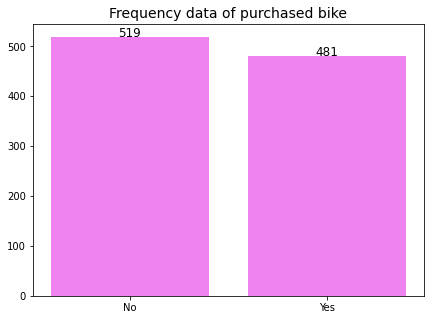

In [45]:
x = ['No', 'Yes']
y = [519, 481]

plt.figure(figsize=(7,5))
plt.bar(x,y, color='violet')
plt.title('Frequency data of purchased bike', fontsize=14)
for index,data in enumerate(y):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

In [46]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


3. Pre-processing Data

In [47]:
features = df.iloc[:,0:12]
features.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36


In [48]:
labels = df.iloc[:,12:]
labels.head()

,Purchased Bike
0,No
1,No
2,No
3,Yes
4,Yes


In [49]:
map = {'Yes': 1, 'No': 0}
labels['Purchased Bike'] = labels['Purchased Bike'].map(map)

In [50]:
features.drop(['ID'], axis = 1, inplace = True)

In [51]:
#one hot encoding
features = pd.get_dummies(features)

In [52]:
features.head()

,Income,Children,Cars,Age,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_No,Home Owner_Yes,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,40000,1,0,42,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0
1,30000,3,1,43,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,80000,5,2,60,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
3,70000,0,1,41,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,30000,0,0,36,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Income                         1000 non-null   int64
 1   Children                       1000 non-null   int64
 2   Cars                           1000 non-null   int64
 3   Age                            1000 non-null   int64
 4   Marital Status_Married         1000 non-null   uint8
 5   Marital Status_Single          1000 non-null   uint8
 6   Gender_Female                  1000 non-null   uint8
 7   Gender_Male                    1000 non-null   uint8
 8   Education_Bachelors            1000 non-null   uint8
 9   Education_Graduate Degree      1000 non-null   uint8
 10  Education_High School          1000 non-null   uint8
 11  Education_Partial College      1000 non-null   uint8
 12  Education_Partial High School  1000 non-null   uint8
 13  Occupation_Clerical

4. Split Data

In [54]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 28) (300, 28) (700, 1) (300, 1)


5. Modelling & Evaluasi Data

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [56]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_true = y_test
print("Accuracy Train:   ", clf.score(X_train,y_train))
print("Accuracy Test:   ", clf.score(X_test,y_test))
print('Presisi :', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy Train:    0.9957142857142857
Accuracy Test:    0.7633333333333333
Presisi : 0.7697841726618705
Recall : 0.7328767123287672


Text(0.5, 1.0, 'Confusion Matrix Model Random Forest')

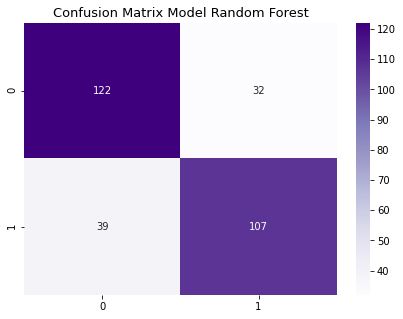

In [57]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Purples')
plt.title("Confusion Matrix Model Random Forest", fontsize=13)

In [58]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 
clf2 = GaussianNB()
clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_test)
y_true = y_test

print("Accuracy Train:   ", clf2.score(X_train,y_train))
print("Accuracy Test:   ", clf2.score(X_test,y_test))
print('Presisi :', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))

Accuracy Train:    0.6214285714285714
Accuracy Test:    0.6333333333333333
Presisi : 0.625
Recall : 0.6164383561643836


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion Matrix Model Naive Bayes')

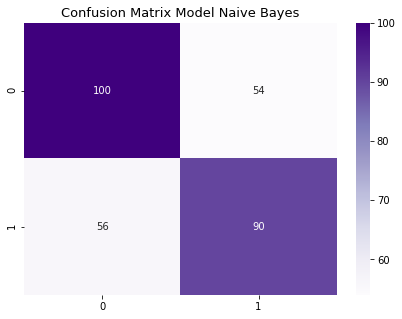

In [59]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Purples')
plt.title("Confusion Matrix Model Naive Bayes", fontsize=13)

In [60]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes = 1000, random_state=20)

clf3.fit(X_train,y_train)

y_pred = clf3.predict(X_test)
y_true = y_test

print("Accuracy Train:   ", clf3.score(X_train,y_train))
print("Accuracy Test:   ", clf3.score(X_test,y_test))
print('Presisi :', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Train:    0.5485714285714286
Accuracy Test:    0.5766666666666667
Presisi : 0.5492227979274611
Recall : 0.726027397260274


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Confusion Matrix Model Neural Network')

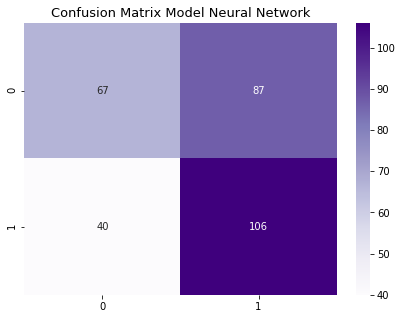

In [61]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Purples')
plt.title("Confusion Matrix Model Neural Network", fontsize=13)

6. Prediction on unlabelled data

In [63]:
unlabelled = pd.read_csv("unlabelled data.csv")
unlabelled

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,28283,Single,Female,100000,0,Bachelors,Professional,No,1,10+ Miles,Pacific,35
1,28299,Married,Male,70000,5,Partial College,Skilled Manual,Yes,1,5-10 Miles,Pacific,49
2,24400,Married,Male,10000,0,Bachelors,Manual,No,1,0-1 Miles,North America,21
3,22942,Single,Female,20000,0,High School,Manual,No,1,0-1 Miles,Europe,28
4,19484,Single,Male,80000,2,Graduate Degree,Skilled Manual,No,2,5-10 Miles,Pacific,50
5,22291,Single,Male,90000,5,Partial College,Professional,No,2,2-5 Miles,Europe,32
6,38380,Single,Female,10000,5,Partial High School,Professional,No,2,2-5 Miles,Europe,31
7,27891,Married,Female,10000,2,Partial College,Manual,Yes,1,5-10 Miles,Pacific,50
8,37832,Single,Female,30000,0,Partial College,Clerical,No,1,2-5 Miles,North America,40
9,36863,Single,Male,20000,0,High School,Management,No,1,1-2 Miles,Europe,28


In [64]:
unlabelled.drop(['ID'], axis = 1, inplace = True)
unlabelled = pd.get_dummies(unlabelled)

In [65]:
unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Income                         10 non-null     int64
 1   Children                       10 non-null     int64
 2   Cars                           10 non-null     int64
 3   Age                            10 non-null     int64
 4   Marital Status_Married         10 non-null     uint8
 5   Marital Status_Single          10 non-null     uint8
 6   Gender_Female                  10 non-null     uint8
 7   Gender_Male                    10 non-null     uint8
 8   Education_Bachelors            10 non-null     uint8
 9   Education_Graduate Degree      10 non-null     uint8
 10  Education_High School          10 non-null     uint8
 11  Education_Partial College      10 non-null     uint8
 12  Education_Partial High School  10 non-null     uint8
 13  Occupation_Clerical    

In [66]:
predictions = clf.predict(unlabelled)

In [67]:
from google.colab import files
columns_titles = ["row_id","Purchased Bike"]
predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'Purchased Bike'}, inplace = True)
predictions_df['Purchased Bike']= predictions_df['Purchased Bike'].astype(int)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

   row_id  Purchased Bike
0       0               1
1       1               0
2       2               0
3       3               0
4       4               1
5       5               0
6       6               0
7       7               1
8       8               1
9       9               0


In [68]:
predictions_df['Purchased Bike'].value_counts()

0    6
1    4
Name: Purchased Bike, dtype: int64

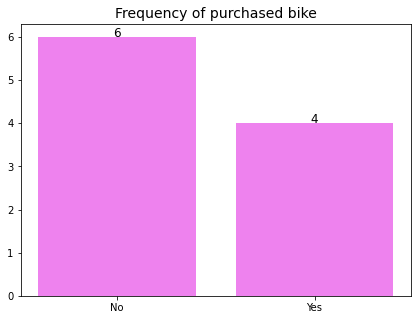

In [69]:
x = ['No', 'Yes']
y = [6, 4]

plt.figure(figsize=(7,5))
plt.bar(x,y, color='violet')
plt.title('Frequency of purchased bike', fontsize=14)
for index,data in enumerate(y):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

7. Feature Importances

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

FI.sort_values(['Extratrees'],ascending=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.10849764 0.10156172 0.08038345 0.19915797 0.02171268 0.02222813
 0.0345132  0.03268451 0.0213905  0.01702271 0.01951096 0.02152087
 0.01656144 0.01628989 0.01360247 0.01020152 0.02118736 0.0174143
 0.025327   0.02333926 0.02907451 0.02398625 0.02078105 0.02249259
 0.02173921 0.01496075 0.02337498 0.01948307]


,Extratrees
Age,0.199158
Income,0.108498
Children,0.101562
Cars,0.080383
Gender_Female,0.034513
Gender_Male,0.032685
Commute Distance_0-1 Miles,0.029075
Home Owner_No,0.025327
Commute Distance_1-2 Miles,0.023986
Region_North America,0.023375
